In [48]:
import numpy as np
import matplotlib.pyplot as plt
from annealing import modify_coupling_matrix
from telecom import get_ising_parameters
from annealing import Ising_energy, exhaustive_search

In [49]:
# ------------ Parameters -------------
N_per_thres = 10000
thres_min = 0.0
thres_max = 0.4
thres_step = 0.01

N = 5               # number of users
M = 4               # length of id-sequence for every user
K = 100              # number of antennas
xi = 0              # std of thermal noise

In [50]:
# activity pattern
alpha = np.zeros(N, dtype=int)
alpha[0] = 1
alpha[1] = 1

In [51]:
# Data generation
N_neglection_thres = int((thres_max-thres_min)/thres_step)+1

neglection_thres = np.zeros(N_neglection_thres)
E_alpha = np.zeros(shape=(N_neglection_thres, N_per_thres))
E_ground = np.zeros(shape=(N_neglection_thres, N_per_thres))

for i in range(N_neglection_thres):
    neglection_thres[i] = thres_min + i*thres_step
    neglection_thres[i] = np.round(neglection_thres[i], 6) # without rounding, there were sometimes thresholds like 0.21000000000000002 which got then written as names on the datafiles
    
    for j in range(N_per_thres):
        J, b, *_ = get_ising_parameters(N, M, alpha, K, xi)
        J_n, where_n = modify_coupling_matrix(J, 1, neglection_thres[i], False)

        minimum_energy_states = exhaustive_search(J_n, b)
        gs_array = minimum_energy_states[0]
        
        if np.shape(minimum_energy_states)[0] > 1:              # should actually not happen
            print("Multiple minimum energy states found. Only the first one used!")

        E_alpha[i, j] = Ising_energy(J, b, alpha)
        E_ground[i, j] = Ising_energy(J, b, gs_array)



In [52]:
print(f"per thresold average over {N_per_thres} datapoints")

# Statistics
E_alpha_mean = np.mean(E_alpha, axis=1)
dE_alpha = np.std(E_alpha, axis=1)
dE_alpha_mean = dE_alpha / np.sqrt(N_per_thres)

E_ground_mean = np.mean(E_ground, axis=1)
dE_ground = np.std(E_ground, axis=1)
dE_ground_mean = dE_ground / np.sqrt(N_per_thres)

per thresold average over 10000 datapoints


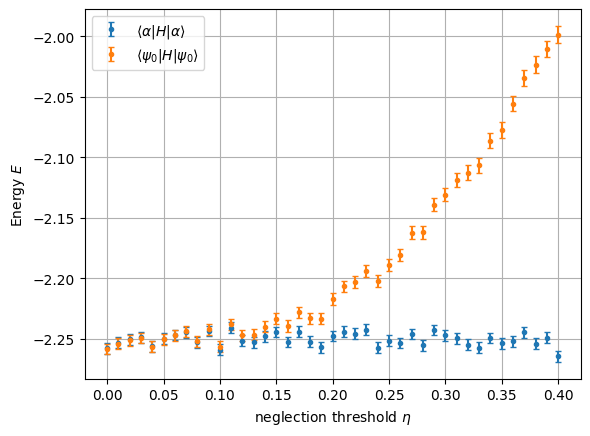

In [53]:
# Plotting
plt.errorbar(x=neglection_thres, y=E_alpha_mean, yerr=dE_alpha_mean, label=r"$\langle \alpha | H |\alpha\rangle$", ls="none", marker=".", capsize=2)
plt.errorbar(x=neglection_thres, y=E_ground_mean, yerr=dE_ground_mean, label=r"$\langle \psi_0 | H |\psi_0\rangle$", ls="none", marker=".", capsize=2)
plt.xlabel(r"rejection threshold $\eta$")
plt.ylabel(r"Energy $E$")
plt.grid()
plt.legend()
plt.show()
